In [45]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
from jax.config import config
config.update("jax_enable_x64", True)

In [46]:
signal_params = ConfigDict(KDV_params_2)
print(signal_params)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 1
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 2.0e-05
c_4: 0.0
dt: 0.001
equation_name: KdV
initial_condition: gaussian
method: Dealiased_SETDRK4
noise_magnitude: 0.0
nx: 256
tmax: 1
xmax: 1
xmin: 0



Next, we specify a signal, by choosing a deterministic solver, 

In [47]:
signal_params.update(E=1,method='Dealiased_ETDRK4',nx = 128*16,P=0,S=0,tmax=4,initial_condition='gaussian')
signal_model = ETD_KT_CM_JAX_Vectorised(signal_params)

initial_signal = initial_condition(signal_model.x, signal_params.E, signal_params.initial_condition)

In [48]:
final, all = signal_model.run(initial_signal, signal_model.nmax, None) #the final input is scan length? 


In [49]:
print(type(all))
print(len(all))
print(all[0].shape) # particles
print(all[1].shape) # signal
#out shape is (n_total, n_particles, n_dim)

<class 'jaxlib.xla_extension.ArrayImpl'>
4000
(1, 2048)
(1, 2048)


In [50]:
print(initial_signal.shape)
print(all.shape)
signal = jnp.concatenate([initial_signal[None,...], all], axis=0)


(1, 2048)
(4000, 1, 2048)


In [51]:
def plot(da_step):
    plt.plot(signal_model.x, signal[da_step,0,:], color='k')
    plt.legend(['signal'])
    plt.show()

interact(plot, da_step=(0, signal_model.nmax))

interactive(children=(IntSlider(value=2000, description='da_step', max=4000), Output()), _dom_classes=('widget…

<function __main__.plot(da_step)>

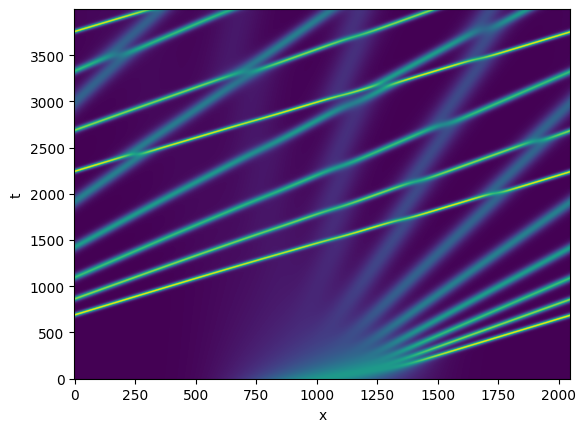

In [52]:
plt.imshow(all[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

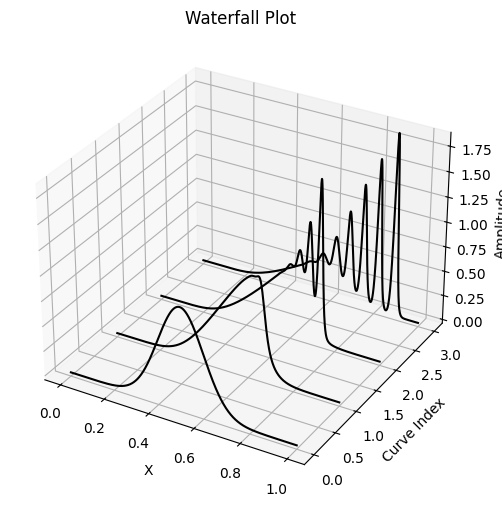

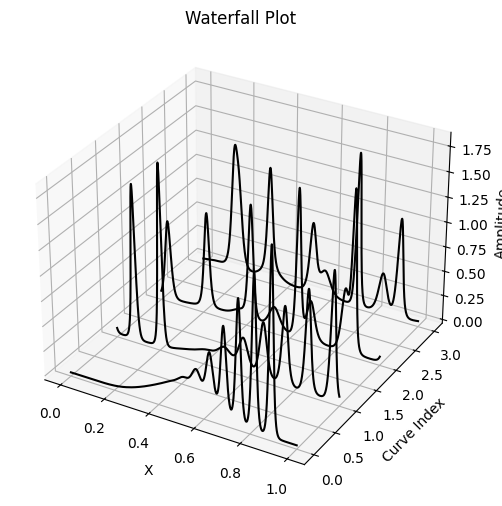

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
def plot_surface_waterfall(x_axis, data, num_lines=None, line_indices=None):
    """
    Creates a 3D surface plot from a 2D NumPy array.
    
    Parameters:
        data (ndarray): 2D array of shape (N, M), where:
                        - N: number of curves
                        - M: number of points per curve
        num_lines (int, optional): Number of curves to plot. If None, plots all.
        line_indices (list, optional): Specific indices of curves to plot. If provided, overrides num_lines.
    """
    N, E, M = data.shape  # Get dimensions
    x = x_axis

    # Determine which rows to plot
    if line_indices is not None:
        indices = np.array(line_indices)
    elif num_lines is None or num_lines >= N:
        indices = np.arange(N)
    else:
        indices = np.linspace(0, N - 1, num_lines, dtype=int)

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot selected curves with an offset
    for i, idx in enumerate(indices):
        ax.plot(x, np.full_like(x, i), data[idx,0, :], label=f'Curve {idx}' if i % 5 == 0 else '',c='k')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Curve Index')
    ax.set_zlabel('Amplitude')
    ax.set_title('Waterfall Plot')

    plt.show()

plot_surface_waterfall(signal_model.x, signal, num_lines=4, line_indices=[0,128,256,512])

plot_surface_waterfall(signal_model.x, signal, num_lines=4, line_indices=[512,1024,2048,4096])


(4001, 1, 2048)


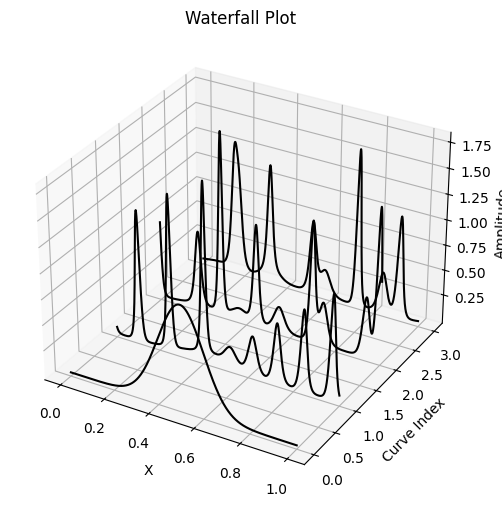

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_waterfall(x_axis, data, num_lines=None):
    """
    Creates a 3D waterfall plot from a 2D NumPy array.
    
    Parameters:
        data (ndarray): 2D array of shape (N, M), where:
                        - N: number of curves
                        - M: number of points per curve
        num_lines (int, optional): Number of curves to plot. If None, plots all.
    """
    N, E, M = data.shape  # Get dimensions
    print(data.shape)
    x = x_axis

    # Determine which rows to plot
    if num_lines is None or num_lines >= N:
        indices = np.arange(N)
    else:
        indices = np.linspace(0, N - 1, num_lines, dtype=int)

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot selected curves with an offset
    for i, idx in enumerate(indices):
        ax.plot(x, np.full_like(x, i), data[idx,0, :], label=f'Curve {idx}' if i % 5 == 0 else '',c='k')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Curve Index')
    ax.set_zlabel('Amplitude')
    ax.set_title('Waterfall Plot')

    plt.show()

# Call the function with a specified number of lines
plot_waterfall(signal_model.x,signal, num_lines=4)


In [61]:
signal_params_low_res = ConfigDict(KDV_params_2)
signal_params_low_res.update(E=1,method='Dealiased_ETDRK4',nx = 128*8,P=0,S=0,tmax=4,initial_condition='gaussian')
signal_params_low_res.update(nx=512)
signal_model_low_res = ETD_KT_CM_JAX_Vectorised(signal_params_low_res)
print(signal_model_low_res.params)
initial_signal_low_res = initial_condition(signal_model_low_res.x, signal_params_low_res.E, signal_params_low_res.initial_condition)
final_low_res, all_low_res = signal_model_low_res.run(initial_signal_low_res, signal_model_low_res.nmax, None) 

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 0
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 2.0e-05
c_4: 0.0
dt: 0.001
equation_name: KdV
initial_condition: gaussian
method: Dealiased_ETDRK4
noise_magnitude: 0.0
nx: 512
tmax: 4
xmax: 1
xmin: 0



interactive(children=(IntSlider(value=2000, description='da_step', max=4000), Output()), _dom_classes=('widget…

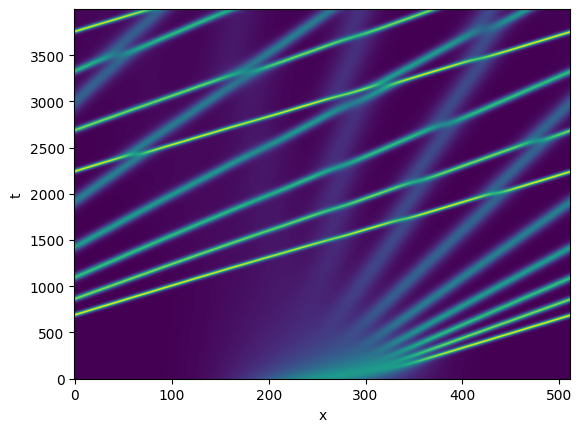

In [62]:
interact(plot, da_step=(0, signal_model_low_res.nmax))
plt.imshow(all_low_res[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [68]:
signal_params_lower_res = ConfigDict(KDV_params_2)
signal_params_lower_res.update(E=1,method='Dealiased_ETDRK4',nx = 128*8,P=0,S=0,tmax=4,initial_condition='gaussian')
signal_params_lower_res.update(nx=128)
signal_model_lower_res = ETD_KT_CM_JAX_Vectorised(signal_params_lower_res)
print(signal_model_lower_res.params)
initial_signal_lower_res = initial_condition(signal_model_lower_res.x, signal_params_lower_res.E, signal_params_lower_res.initial_condition)
final_lower_res, all_lower_res = signal_model_lower_res.run(initial_signal_lower_res, signal_model_lower_res.nmax,None) 

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 0
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 2.0e-05
c_4: 0.0
dt: 0.001
equation_name: KdV
initial_condition: gaussian
method: Dealiased_ETDRK4
noise_magnitude: 0.0
nx: 128
tmax: 4
xmax: 1
xmin: 0



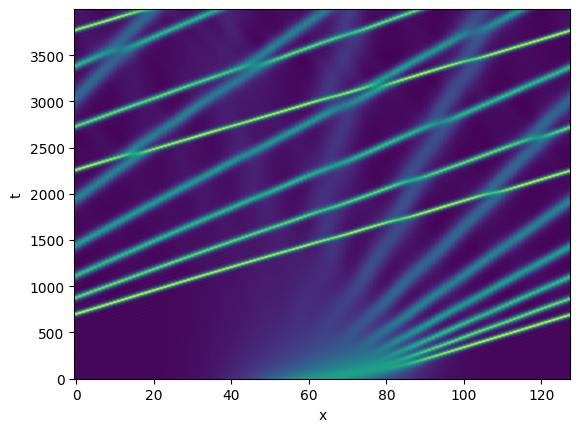

In [69]:
plt.imshow(all_lower_res[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()